<a href="https://colab.research.google.com/github/JoDeMiro/ImageProcessing/blob/main/40_Image_Compression_with_FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tartalom

A programot tőle függetlenül megírtam már korábban, de a magyarázata annyira jó, hogy ide raktam.

https://youtu.be/uB3v6n8t2dQ?t=737

Az egyik legjobb, legszemléletesebb magyarázat, hasonlata a Fourier Transzformációra.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import skimage.io

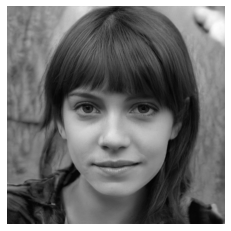

In [ ]:
A = skimage.io.imread('https://github.com/JoDeMiro/ImageProcessing/blob/main/images/woman2.jpg?raw=true')

B = np.mean(A, -1)

plt.figure()
plt.imshow(B, cmap = 'gray')
plt.axis('off')
plt.show()


Threshold =  5429.813071254502
Threshold =  9845.45597635913
Threshold =  37267.187101727635
Threshold =  250649.17195963205


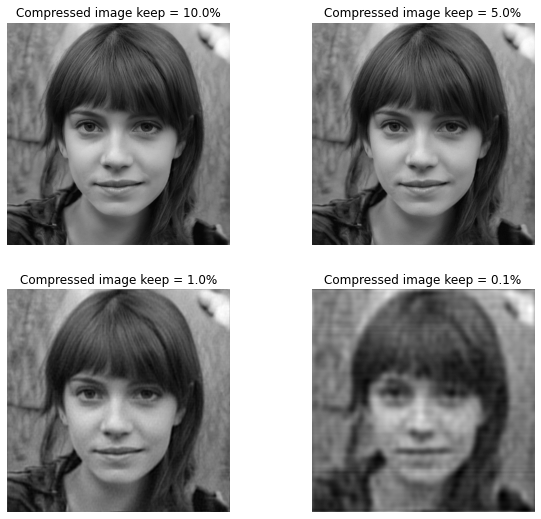

In [ ]:
Bt = np.fft.fft2(B)

Btsort = np.sort(np.abs(Bt.reshape(-1))) # Rendezés magnitúdó szerint csökkenő sorrendben

fig, ax = plt.subplots(2, 2, figsize=(10, 9))

# A tűréshatárnál kisebb koefficienseket nullázuk ki
for i, keep in enumerate([0.1, 0.05, 0.01, 0.001]):
  thresh = Btsort[int(np.floor((1-keep)*len(Btsort)))]
  print('Threshold = ', thresh)
  index = np.abs(Bt) > thresh     # Ahol a koefficiens nagyobb mint a küszöbérték (ott 1, egyébként 0)
  masked = Bt * index             #
  Bmasked = np.fft.ifft2(masked).real # A tömörített kép
  z = int(np.floor(i/2))
  w = i%2
  ax[z, i%2].imshow(Bmasked, cmap = 'gray')
  ax[z, i%2].axis('off')
  ax[z, i%2].set_title('Compressed image keep = ' + str(keep*100) + '%')
plt.show()
